# Assignment 4 | COMPSCI 369

- Sabaoon Raza Khan
- skha787 
- 983957824

<br><hr> 
### Importing all necessary modules and packages:

In [1]:
import numpy
import pandas

<hr><br>
### Problem 1: 
**Implementing and applying the overlap alignment algorithm.**<br><br>

<hr>
**(a)**
**Overlap Alignment** = Global type alignment that does not penalize the unmatched overhanging ends.
- The boundary conditions are F(i, 0) = F(0, j) = 0 for all i, j
- The recurrence relation is just the global recurrence.
- Start the traceback at the position on the boundary where a maximum is achieved, F(i, m) or F(n, j).
- The traceback stops when the other border is reached, F(i, 0) or F(0, j).

In [ ]:
Pseudocode for global alignment


% make the F matrix

1   for i = 0 to length(A)
2       F(i, 0) <- d*i
3   for j = 0 to length(B)
4       F(0, j) <- d*j
5   for i = 1 to length(A)
6       for j = 1 to length(B)
7       {
8         Match <- F(i-1, j-1) + S(Ai, Bj)
9         Delete <- F(i-1, j) + d
10        Insert <- F(i, j-1) + d
11        F(i, j) <- max(Match, Insert, Delete)
12      }


% backtrack and form alignment

13  AlignmentA <- ""
14  AlignmentB <- ""
15  i <- length(A)
16  j <- length(B)
17  while (i > 0 or j > 0)
18  {
19      if (i > 0 and j > 0 and F(i, j) == F(i-1, j-1) + S(Ai, Bj))
20      {
21          AlignmentA <- Ai + AlignmentA
22          AlignmentB <- Bj + AlignmentB
23          i <- i - 1
24          j <- j - 1
25      }
26      else if (i > 0 and F(i, j) == F(i-1, j) + d)
27      {
28          AlignmentA <- Ai + AlignmentA
29          AlignmentB <- "-" + AlignmentB
30          i <- i - 1
31      }
32      else (j > 0 and F(i, j) == F(i, j-1) + d)
33      {
34          AlignmentA <- "-" + AlignmentA
35          AlignmentB <- Bj + AlignmentB
36          j <- j - 1
37      }
38  }

**Converting the Pseudocode for Global Alignment to Overlap Alignment:**
<br>
- Altering lines: 2, 4
- Added lines: 17-36 & 59-61

In [ ]:
Pseudocode for Overlap Alignment


% make the F matrix

1   for i = 0 to length(A)
2       F(i, 0) <- 0
3   for j = 0 to length(B)
4       F(0, j) <- 0
5   for i = 1 to length(A)
6       for j = 1 to length(B)
7       {
8           Match <- F(i-1, j-1) + S(Ai, Bj)
9           Delete <- F(i-1, j) + d
10          Insert <- F(i, j-1) + d
11          F(i, j) <- max(Match, Insert, Delete)
12      }


% backtrack and form alignment

13  AlignmentA <- ""
14  AlignmentB <- ""
15  i <- length(A)
16  j <- length(B)


    % Pseudocode Added
    
17  % Append non-overlapping sequence or gaps (Before)
18  AlignmentA = A[i+1:] if i+1 < length(A) else '-' * (length(B) - j - 1)
19  AlignmentB = B[j+1:] if j+1 < length(B) else '-' * (length(A) - i - 1)
    
20  rowMax <- 0
21  for b = 0 to length(B)
22      if (F(i-1, b) >= F(i-1, b+1)) {
23         rowMax <- b }
24      else (F(i-1, b) < F(i-1, b+1)) {
25          rowMax <- b+1 }       
26  colMax <- 0    
27  for a = 0 to length(A)
28      if (F(a, j-1) >= F(a+1, j-1)) {
29          colMax <- a }
30      else (F(a, j-1) < F(a+1, j-1)) {
31          colMax <- +1 }
32  maxBoundary <- max(rowMax, colMax)
33  if (rowMax >= colMax) {
34      j <- maxBoundary }
35  else {
36      i <- maxBoundary }
    
    
37  while (i > 0 or j > 0)
38  {
39      if (i > 0 and j > 0 and F(i, j) == F(i-1, j-1) + S(Ai, Bj))
40      {
41          AlignmentA <- Ai + AlignmentA
42          AlignmentB <- Bj + AlignmentB
43          i <- i - 1
44          j <- j - 1
45      }
46      else if (i > 0 and F(i, j) == F(i-1, j) + d)
47      {
48          AlignmentA <- Ai + AlignmentA
49          AlignmentB <- "-" + AlignmentB
50          i <- i - 1
51      }
52      else (j > 0 and F(i, j) == F(i, j-1) + d)
53      {
54          AlignmentA <- "-" + AlignmentA
55          AlignmentB <- Bj + AlignmentB
56          j <- j - 1
57      }
58  }

59  % Append non-overlapping sequence or gaps (After)
60  AlignmentA = (A[:i] if i > 0 else '-' * j) + AlignmentA
61  AlignmentB = (B[:j] if j > 0 else '-' * i) + AlignmentB

<br><br><hr>

**(b)** The pseudo-code produces a single alignment with the optimal score. Is this
alignment the same regardless of the order in which the two sequences are
passed as arguments to the method? Explain why or why not.  
  
**Answer:**  
The alignment is not the same regardless of the order in which the two sequences are
passed as arguments to the method.

<br><br><hr>

**(c) Overlap Alignment** algorithm implemented based on the pseudo-code produced in part (a).  

**Input Parameters:**
- Two sequences
- Score matrix
- Linear gap penalty.   

**Returns:** Single alignment with the optimal score.

In [2]:
# A = Sequence on y-axis
# B = Sequence on x-axis
# S = Score Matrix (BLOSUM62)
# d = Gap Penalty

def overlap_alignment(A, B, S, d):                                                        

    # --------------------------------------------------------------------------------------------------------------------- 
    
    # Creating the score value matrix
    score = [['-' for J in range(len(B) + 1)] for I in range(len(A) + 1)]
    # Pointer matrix for backtracking 
    pointer = [['-' for J in range(len(B) + 1)] for I in range(len(A) + 1)]
    
    # Overlap alignment does not penalize the unmatched overhanging ends
    for i in range(len(A) + 1):
        score[i][0] = 0
        pointer[i][0] = 1
        
    for j in range(len(B) + 1):
        score[0][j] = 0 
        pointer[0][j] = 2

    # Scoring the sequence alignment    
    for i in range(1, len(A)+1):    
        for j in range(1, len(B)+1):
            diag = score[i-1][j-1] + S[A[i-1]][B[j-1]]
            left = score[i][j-1] + d
            up = score[i-1][j] + d
            score[i][j] = int(max(diag, up, left))

            # 3 = Diagonal trace
            # 2 = Left trace
            # 1 = Up trace
            
            if score[i][j] == diag:
                pointer[i][j] = 3
            elif score[i][j] == left:
                pointer[i][j] = 2
            elif score[i][j] == up :
                pointer[i][j] = 1
                
    #print(numpy.asarray(pointer)) 
    
    # ---------------------------------------------------------------------------------------------------------------------           
            
    # Finding the position on the boundary where a maximum is achieved.
    scoreArray = numpy.asarray(score)                                       # Converting to numpy array
    col_max = numpy.argmax(scoreArray, axis = 0)                            # Returns index of highest value in each column
    row_max = numpy.argmax(scoreArray, axis = 1)                            # Returns index of highest value in each row

    maxVal = 0
    if scoreArray[col_max[-1]][len(B)] > scoreArray[len(A)][row_max[-1]]:   # Checking if value in last column > last row
        i = col_max[-1]
        j = len(B)
        maxVal = scoreArray[i][j]                                           
    else: 
        i = len(A)
        j = row_max[-1]
        maxVal = scoreArray[i][j]                                           # Assigning position of where max is achieved
           
            
    #print("Alignment Score Matrix:\n", scoreArray, sep="")    
    #print("\nIndex of max value at boundary:\n", "(i, j) = (", i, ", ", j, ")", sep="")
    
    # ---------------------------------------------------------------------------------------------------------------------    
        
    # Backtrack and form alignment:
       
    # Append non-overlapping sequence or gaps (Before)
    alignment_A = A[i+1:] if i+1 < len(A) else '-' * (len(B) - j - 1)
    alignment_B = B[j+1:] if j+1 < len(B) else '-' * (len(A) - i - 1)
    
    
    # 3 = Diagonal trace
    # 2 = Left trace
    # 1 = Up trace
            
    while True: 
        if (pointer[i][j] == 3):                   # diag = score[i-1][j-1] + S[A[i-1]][B[j-1]]
            alignment_B = B[j - 1] + alignment_B
            alignment_A = A[i - 1] + alignment_A
            i -= 1
            j -= 1
        elif (pointer[i][j] == 2):                 # left = score[i][j-1] + d
            alignment_A = '-' + alignment_A
            alignment_B = B[j - 1] + alignment_B
            j -= 1
        elif (pointer[i][j] == 1):                 # up = score[i-1][j] + d
            alignment_A = A[i - 1] + alignment_A
            alignment_B = '-' + alignment_B
            i -= 1
            
        if (i == 0 or j == 0): break
        
        
    # Append non-overlapping sequence or gaps (After)
    alignment_A = (A[:i] if i > 0 else '-' * j) + alignment_A
    alignment_B = (B[:j] if j > 0 else '-' * i) + alignment_B
    
    # ---------------------------------------------------------------------------------------------------------------------
    
    print("\nOptimal alignment:\n", alignment_A, "\n", alignment_B, sep="")
    print("\nOptimal alignment score:", maxVal) 

<br><br><hr>

**(d)** Uniprot is an online protein sequence database from where the files have been downloaded.  
Importing & printing protein sequences with accession numbers $H0Y8P2$ and $N1J540$.

In [3]:
def read_fasta(file):
    name, sequence = None, []
    for line in file:
        line = line.rstrip()                           # Removing all whitespace characters from the end of line
        if line.startswith(">"):                       # Separating file name from sequence
            if name: yield (name, ''.join(sequence))
            name, sequence = line, []
        else:
            sequence.append(line)
    if name: yield (name, ''.join(sequence))           # Returns sequence of type "string"

        
def print_fasta(filename):
    title = filename.rpartition('.')[0]                # Partitioning & getting filename before "."
    with open(filename) as file:                       # Opening given file
        for name, sequence in read_fasta(file):        # Reading file using read_fasta function
            print("Protein sequence with accession number ", title, ":\n", sequence, sep="")

            
def return_sequence(filename):
    with open(filename) as file:                       
        for name, sequence in read_fasta(file):        
            return sequence
            
            
# Printing sequences given filenames            
print()
print_fasta('H0Y8P2.fasta')
print()
print_fasta('N1J540.fasta')


Protein sequence with accession number H0Y8P2:
XILESPEHLPSNFLAQPVNDSAPHPESDATCQQPVKQMRLKKAIHLKKLNFLKSQKYAEQVSEPKSDDGLTKRLESASKNTLEKASSQSAEEKESEEVVSCENFNCISETERPEDPAALEDQSQTLQSQRQYACELCGKPFKHPSNLELHKRSHTGKCFGGSGDLRRHVRTHTG

Protein sequence with accession number N1J540:
MHPAQLSKLLSIPDSHAQEILDYAATLSKDEAVNHFREFLGNSLEMRNFISAYELQREGSMTSQNTGAPANVTRISNKNTASHKSMSKGVPATSTSKISQKKMTQNDYTAASKKTQFGTSTHSSNPSGPIAHPSNLYPGLNQSKEKNARNGSPAFPNKVKIAISGGQSMHGTSTTISEIEAAIRSLEISTNSSLSSQDPSKRACNCIATQHPLLTAAPNCLSCGKVICVKEGFGPCTYCGEPLLSAVEVQKMISVLREDCGREKMLANDQRQKHATASSNSKPFPQSQPINTQISRAELEARTHRDKLLAFQAQNAKRTTVRDEVAEVNVDLAAVERDMIWATPVERARALKKQQKLLQEQEWNARPEYERKRMVVSLNVVGGKVVKNIGRTERRPQADLIAAAEKSSLEKEEMEPVAQEQGHSTQVFRRNPLELQQQKKPAYTWRRVQDNQDDNESYILDGGLKGREVD


<br><br><hr>

**(e)** Both of these sequences contain a zinc-finger, which is a small protein region that binds to zinc. 
There are multiple classes of zinc finger. 
A protein sequence from the $Cys2His2$ class is: $YECENCAKVFTDPSNLQ$  

Using the overlap alignment algorithm with the given BLOSUM62 matrix
and a gap penalty of 8, we find and print an optimal alignment between $H0Y8P2$
and the given zinc-finger sequence and $N1J540$ and the given zinc-finger sequence.

<br><br>

**Reading in the BLOSUM62 Matrix:**

In [4]:
def readBLOSUM62():

    text_file = open("blosum62.txt", "r")
    A = text_file.read().split("\n")
    blosum62 = numpy.zeros([23, 23])
    for i in range(1,24):
        lineSplit = A[i].split("\t")
        for j in range(1,24):
            blosum62[i-1,j-1] = lineSplit[j]

    # The first 20 rows/columns are amino acids and the last 3 represent unknowns
    names = ["A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V","B","Z","X"]
    BLOSUM_df = pandas.DataFrame(blosum62, index=names, columns=names)
    
    return BLOSUM_df

Initialising variables:

In [5]:
# Read in the matrix from the blosum62.txt file. 
BLOSUM62 = readBLOSUM62()                       # Represents Score Matrix

H0Y8P2 = return_sequence('H0Y8P2.fasta')
N1J540 = return_sequence('N1J540.fasta')
Cys2His2 = "YECENCAKVFTDPSNLQ"                  # Zinc-finger sequence

gap_penalty = -8

<br>
**Optimal alignment between H0Y8P2 and the given zinc-finger sequence.**

In [6]:
overlap_alignment(H0Y8P2, Cys2His2, BLOSUM62, gap_penalty)
print()


Optimal alignment:
XILESPEHLPSNFLAQPVNDSAPHPESDATCQQPVKQMRLKKAIHLKKLNFLKSQKYAEQVSEPKSDDGLTKRLESASKNTLEKASSQSAEEKESEEVVSCENFNCISETERPEDPAALEDQSQTLQSQRQYACELCGKPFKHPSNLEHKRSHTGKCFGGSGDLRRHVRTHTG
-----------------------------------------------------------------------------------------------------------------------------------YECENCAKVFTDPSNLQ-------------------------

Optimal alignment score: 56



<br>
**Optimal alignment between N1J540 and the given zinc-finger sequence.**

In [7]:
overlap_alignment(N1J540, Cys2His2, BLOSUM62, gap_penalty)
print()


Optimal alignment:
MHPAQLSKLLSIPDSHAQEILDYAATLSKDEAVNHFREFLGNSLEMRNFISAYELQREGSMTSQNTGAPANVTRISNKNTASHKSMSKGVPATSTSKISQKKMTQNDYTAASKKTQFGTSTHSSNPSGPIAHPSNLYGLNQSKEKNARNGSPAFPNKVKIAISGGQSMHGTSTTISEIEAAIRSLEISTNSSLSSQDPSKRACNCIATQHPLLTAAPNCLSCGKVICVKEGFGPCTYCGEPLLSAVEVQKMISVLREDCGREKMLANDQRQKHATASSNSKPFPQSQPINTQISRAELEARTHRDKLLAFQAQNAKRTTVRDEVAEVNVDLAAVERDMIWATPVERARALKKQQKLLQEQEWNARPEYERKRMVVSLNVVGGKVVKNIGRTERRPQADLIAAAEKSSLEKEEMEPVAQEQGHSTQVFRRNPLELQQQKKPAYTWRRVQDNQDDNESYILDGGLKGREVD
------------------------------------------------------------------------------------------------------------------------YECENCAKVFTDPSNLQ--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Optimal alignment score: 16



<br><br><hr>

**(f)** Use the score of each alignment to decide which sequence has a $Cys2His2$ zinc-finger and which does not. 
Which residues in the nominated sequence contain the zinc-finger?  
<br> 
**Answer:** <br>
Since the alignment between H0Y8P2 and Cys2His2 gives us a greater optimal alignment score, we can say that the sequence H0Y8P2 contains the Zinc-finger.

In [8]:
nominated = H0Y8P2
found_sequence = "YACELCGKPFKHPSNLE"
residue_start = nominated.find(found_sequence)
end = len(found_sequence)

print("\nResidues ", residue_start, " to ", residue_start+end, " contain the zinc-finger in the nominated sequence.", sep="")


Residues 131 to 148 contain the zinc-finger in the nominated sequence.


<hr><br><br>
### Problem 2: 
**Application of the Hidden Markov Model (HMM).**<br><br>

We assume that at each point of the sequence, the residue is associated with one
of three secondary structures: α-helix, β-strand and loops which we label H, S
and T, respectively. To simplify the problem, we classify the amino acids as either
hydrophobic, hydrophilic or neutral (B, I or N, respectively) so a sequence can be
represented by this 3-letter alphabet.<br><br>
In a α-helix, the residues are 35% hydrophobic, 55% hydrophilic and 10% neutral.
In a β-strand, the respective proportions are 55%, 15%, 30% and in a loop they
are 10%, 10%, 80%.<br><br>
Assume that all secondary structures have geometrically distributed length with
α-helices having mean 20 residues, β-strands having a mean of 12 residues and
loops a mean of 10 residues. A β-strand is followed by an α-helix 40% of the time
and a loop 60% of the time. An α-helix is followed by a β-strand 20% of the time
and a loop 80% of the time and a loop is equally likely to be followed by a strand
or a helix. At the start of a sequence, any structure is equally likely.
<br><br><br><hr>
**(a) Deriving the transition probabilities:**

In [9]:
STATES = ('H', 'S', 'T')

# L is geometrically distributed with parameter p, then E[L] = 1/p
H_p = 1/20
S_p = 1/12
T_p = 1/10

# Probability: (Failure = 1 - Success) & Vice-versa
HH = 1 - (H_p)
SS = 1 - (S_p)
TT = 1 - (T_p)

# Creating python dictionary for easy assignment & access
a = {
'H': {'H': HH, 'S': 0.2*H_p, 'T': 0.8*H_p},
'S': {'H': 0.4*S_p, 'S': SS, 'T': 0.6*S_p},
'T': {'H': 0.5*T_p, 'S': 0.5*T_p, 'T': TT},
}

print("\nTransition Probabilities:\n")
for x in a:
    print('{} -> {}: {:<6f}  |  {} -> {}: {:<6f}  |  {} -> {}: {:<6f}'.format(x,'H', a[x]['H'],x,'S', a[x]['S'],x,'T', a[x]['T']))


Transition Probabilities:

H -> H: 0.950000  |  H -> S: 0.010000  |  H -> T: 0.040000
S -> H: 0.033333  |  S -> S: 0.916667  |  S -> T: 0.050000
T -> H: 0.050000  |  T -> S: 0.050000  |  T -> T: 0.900000


<br><br><hr>

**(b) Diagram of the HMM:** (Showing only state nodes and transitions)

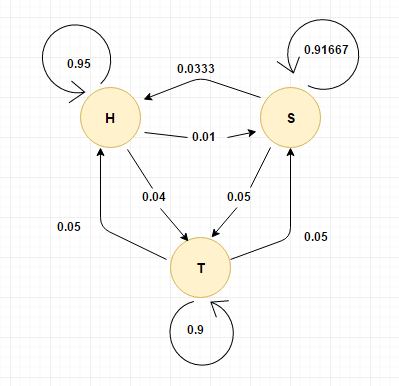

In [10]:
from IPython.display import Image
Image(filename="HMM.PNG")

**Emission probabilities for each state shown in the following table:**

In [11]:
SYMBOLS = ('B', 'I', 'N')

# Python Dictionary
e = {
'H': {'B': 0.35, 'I': 0.55, 'N': 0.10},
'S': {'B': 0.55, 'I': 0.15, 'N': 0.30},
'T': {'B': 0.10, 'I': 0.10, 'N': 0.80},
}

<table style="width:25%">
  <tr>
    <th></th>
    <th>B</th> 
    <th>I</th>
    <th>N</th>
  </tr>
  <tr>
    <th>H</th>
    <td>0.35</td>
    <td>0.55</td>
    <td>0.10</td>
  </tr>
  <tr>
    <th>S</th>
    <td>0.55</td>
    <td>0.15</td>
    <td>0.30</td>
  </tr>
  <tr>
    <th>T</th>
    <td>0.10</td>
    <td>0.10</td>
    <td>0.80</td>
  </tr>
</table>

<br><br><hr>

**(c)** Method to simulate state and symbol sequences of arbitrary length from the HMM. 
<br><br>
**Parameters:**
- Sequence length
- a (Transition Probabilities)
- e (Emission Probabilities)

**Return:**
- Simulate and print out a state and symbol sequence of length 150.

In [12]:
def HMM_Simulation(length, a, e):
    states = []
    symbols = []
    if length > 0:
        states.append(numpy.random.choice(STATES)) # Initial state for the sequence is distributed uniformly
        # Getting symbol based on "last" state
        symbols.append(numpy.random.choice(SYMBOLS, p = [e[states[-1]][_] for _ in SYMBOLS])) 
        for num in range(1, length): # Not executed if length = 1
            states.append(numpy.random.choice(STATES, p = [a[states[-1]][_] for _ in STATES]))
            symbols.append(numpy.random.choice(SYMBOLS, p = [e[states[-1]][_] for _ in SYMBOLS]))
    return states, symbols

#----------------------------------------------------------------------------------------------------------------------------

states, symbols = HMM_Simulation(150, a, e) # Given parameters

print("\nState Sequence:")
print('\n'.join(' '.join(s) for s in numpy.array_split(states, 3))) # Splitting sequence into 3 parts to output

print("\nSymbol Sequence:")
print('\n'.join(' '.join(s) for s in numpy.array_split(symbols, 3)))


State Sequence:
H H H H H H H H H H H H H H H H H H H H H H H H H H H T T T T T T T T T T T T T T T T T T T T T T T
T T T T T T T T T T T H H H H H H H H H H S S S S S S S S S S H H H H T T T T T T T H H H H H H H H
H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H H T T T T T T H H H H H H H

Symbol Sequence:
B B B I B I B I N I B I N I B I N I I N B I I N I B I N N N I N N N N N N N N N I B I N N N N N N B
N N N N N I N N N B N B I I I N B I B B B B N N N B N B B N N B I I I N N N N N I N B B I I I I I I
I B B I I I I B I B I N B I I I B N B B B I N I I B B I N I I I I B B I I N N N N N B I I I I I B B


<br><br><hr>

**(d)** Calculating the *natural* logarithm of the joint probability $P(x, π)$. 

We know, $$P(x,\pi) = P(x,\pi|\mathbf{e,a}) = a_{0 \pi_1} \prod_{i = 1}^L e_{\pi_i}(x_i)a_{\pi_i \pi_{i+1}}$$

Taking it's log:
$$log(P(x,\pi)) = log(P(x,\pi|\mathbf{e,a})) = log(a_{0 \pi_1} \prod_{i = 1}^L e_{\pi_i}(x_i)a_{\pi_i \pi_{i+1}})$$
$$log(P(x,\pi)) = log(P(x,\pi|\mathbf{e,a})) = log(a_{0 \pi_1})+log( \prod_{i = 1}^L e_{\pi_i}(x_i)a_{\pi_i \pi_{i+1}})$$
$$log(P(x,\pi)) = log(P(x,\pi|\mathbf{e,a})) = log(a_{0 \pi_1})+\sum_{i = 1}^Llog(e_{\pi_i}(x_i))+\sum_{i = 1}^Llog(a_{\pi_i \pi_{i+1}})$$

<br>
**Parameters:**<br>
- Take x, π, a and e as arguments.

**Returns:**<br>
- Calculates P(x, π) for π and x given and for the sequences simulated in part 2(c).

In [13]:
# Algorithm based on above formula:
# Joint probability of state & symbol sequence

def log_jointProb(states, symbols, a, e):
    logProb = 0 # Initialising log probability
    if len(states) > 0:
        # Natural log (log_e = ln)
        logProb -= numpy.log(len(STATES))
        logProb += numpy.log(e[states[0]][symbols[0]])
        for i in range(1, len(states)):
            logProb += numpy.log(e[states[i]][symbols[i]])
            logProb += numpy.log(a[states[i-1]][states[i]])
    return logProb

<br>
**Log Probability for sequences in previous part:**

In [14]:
print(log_jointProb(states, symbols, a, e)) 

-163.609330708


<br>
**Log Probability for P(x, π) given below:**<br><br>
$π = S,S,S,S,T,T,S,S,S,S,S,S,S,H,H,H,H,H,H,H,H,H,H,H,H$<br>
$x = I,N,I,B,N,B,N,B,B,B,N,N,B,B,B,B,I,I,I,I,I,B,N,B,I$

In [15]:
π = "SSSSTTSSSSSSSHHHHHHHHHHHH"
x = "INIBNBNBBBNNBBBBIIIIIBNBI" 

print(log_jointProb(π, x, a, e)) 

-37.2077259194


<br><br><hr>

**(e) Implementing the forward algorithm for HMMs to calculate the natural logarithm of the probability P(x).** <br>
- *Method takes x, a and e as arguments.* 

<br><br>

The log probability of the simulated symbols is given by the forward algorithm.  

$$F_l(i) = \log \left[ e_l(x_i) \sum_k  f_k(i-1)a_{kl})\right]  = E_l(x_i) +  \log \left[\sum_k  f_k(i-1)a_{kl})\right]$$
$$P(x) = logsum_k (F_k(L))$$
$$log(P(x))=log(logsum_k (F_k(L)))$$

In [16]:
# logsum function as given in the notes:
def logsum(x):
    return x[0] + numpy.log(numpy.sum(numpy.exp(x - x[0])))

def HMM_forward(x, a, e):
    logProb = numpy.zeros(len(STATES))                                           # Creating a numpy array
    if len(x) > 0:
        for index, state in enumerate(STATES):                                   # Enumerate = Returns index & value
            logProb[index] = numpy.log(e[state][x[0]]) - numpy.log(len(STATES))
        for symbol in x[1:]:                                                     # For all symbols except at index 0
            prev = logProb
            logProb = numpy.zeros(len(STATES))
            for index, state in enumerate(STATES):
                logProb[index] = numpy.log(e[state][symbol]) + logsum([prev[y] + numpy.log(a[z][state]) for y, z in enumerate(STATES)])
    return logsum(logProb)

<br>
**Calculating log(P(x)) for π and x given above:**

In [17]:
print(HMM_forward(x, a, e))

-27.4657941038


<br>
**Using the forward algorithm to calculate log(P(x)) for sequences simulated in Q2(c):**

In [18]:
print(HMM_forward(symbols, a, e))

-150.56333412


<br>
**How does P(x) compare to P(x, π) for the examples you calculated? 
Does this relationship hold in general? Explain your answer.**

In both of the calculated examples, the natural log of the joint probability P(x, π) is lesser as compared to the natural log of the probability P(x), i.e. <br><br>
$$P\left(x, \pi\right) \leq P\left(x\right)$$ 
In general this relationship does hold and is true because:<br><br>
$$P\left(x\right) = \sum_{\pi^\prime}{P\left(x, \pi^\prime\right)} = \sum_{\pi^\prime\neq\pi}{P\left(x, \pi^\prime\right)} + P\left(x, \pi\right) \geq P\left(x, \pi\right)$$

<br><hr>